Vaguely following the tutorial: 
https://www.tensorflow.org/text/tutorials/text_classification_rnn

In [1]:
#from keras.datasets import imdb
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import LSTM, Activation, Dropout, Dense, Input
from keras.layers.embeddings import Embedding
from keras.models import Model
import string
import re
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/Users/lucasgover/Desktop/Political-Sentiment-Analysis-PG-Capstone/IdeologyBills.csv')

data['text'] = data['text'].str.lower()
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [3]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", 
             "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during",
             "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
             "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or",
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", 
             "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's",
             "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up",
             "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's",
             "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've",
             "your", "yours", "yourself", "yourselves" ]
             

In [4]:
def remove_stopwords(data):
  data['review without stopwords'] = data['text'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stopwords)]))
  return data

def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
    
data_without_stopwords = remove_stopwords(data)
data_without_stopwords['clean_review']= data_without_stopwords['review without stopwords'].apply(lambda cw : remove_tags(cw))
data_without_stopwords['clean_review'] = data_without_stopwords['clean_review'].str.replace('[{}]'.format(string.punctuation), ' ')


/var/folders/jn/grz4j9xj2dd9pq6p41gbk1j00000gn/T/ipykernel_34724/1737250945.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data_without_stopwords['clean_review'] = data_without_stopwords['clean_review'].str.replace('[{}]'.format(string.punctuation), ' ')


In [5]:
print(data_without_stopwords['clean_review'][0])

amend title 28 united states code provide establishment code conduct justices supreme court united states purposes   congressional bills 117th congress   from u s  government publishing office   h r  7426 introduced house  ih    117th congress 2d session h  r  7426 amend title 28 united states code provide establishment code conduct justices supreme court united states purposes                                                                          house representatives april 6 2022 mr  johnson georgia  for mr  nadler mr  jones mr  cicilline mr  quigley  introduced following bill  referred committee judiciary addition committees oversight reform house administration period subsequently determined speaker case consideration provisions fall within jurisdiction committee concerned                                                                         bill amend title 28 united states code provide establishment code conduct justices supreme court united states purposes  enacted senate ho

In [6]:
chunk_size = 100
reviews_list = []
sentiment = []
reviews = data_without_stopwords['clean_review']
sentiment_index = 0
num_words = 0
for review in reviews:
    index = 0
    word = ""
    curr_chunk = ""
    while True:
        if index >= len(review):
            break
        if num_words < chunk_size:
            if review[index] not in "asdfghjklzxcvbnmqwertyuiop1234567890":
                curr_chunk += (" " + word)
                word = ""
                num_words += 1
            else:
                word += review[index]
            index+=1
        else:
            sentiment.append(data_without_stopwords['Ideology'][sentiment_index])
            reviews_list.append(curr_chunk[1:])
            curr_chunk = ""
            num_words = 0
    sentiment_index += 1

In [7]:
print(len(reviews_list))
print(len(sentiment))
print(reviews_list[0])

16664
16664
amend title 28 united states code provide establishment code conduct justices supreme court united states purposes   congressional bills 117th congress   from u s  government publishing office   h r  7426 introduced house  ih    117th congress 2d session h  r  7426 amend title 28 united states code provide establishment code conduct justices supreme court united states purposes                               


In [8]:
y = np.array(sentiment)

X_train, X_test,Y_train, Y_test = train_test_split(reviews_list, y, test_size=0.2, random_state = 45)

In [9]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

words_to_index = tokenizer.word_index
words_to_index

{'section': 1,
 'a': 2,
 '1': 3,
 'shall': 4,
 'b': 5,
 'act': 6,
 '2': 7,
 'c': 8,
 's': 9,
 'states': 10,
 'mr': 11,
 'united': 12,
 'secretary': 13,
 'not': 14,
 'subsection': 15,
 'the': 16,
 'sec': 17,
 '3': 18,
 'u': 19,
 'paragraph': 20,
 'may': 21,
 'title': 22,
 'congress': 23,
 'following': 24,
 'house': 25,
 'i': 26,
 'general': 27,
 'including': 28,
 'ii': 29,
 'program': 30,
 'purposes': 31,
 'year': 32,
 'federal': 33,
 'inserting': 34,
 'amended': 35,
 'date': 36,
 'state': 37,
 'term': 38,
 'd': 39,
 'h': 40,
 'striking': 41,
 'representatives': 42,
 'committee': 43,
 'code': 44,
 'described': 45,
 '4': 46,
 'health': 47,
 'national': 48,
 '2022': 49,
 'services': 50,
 'security': 51,
 '5': 52,
 'government': 53,
 'information': 54,
 'subparagraph': 55,
 'public': 56,
 'service': 57,
 '117th': 58,
 'ms': 59,
 'bill': 60,
 'means': 61,
 'individual': 62,
 'respect': 63,
 'report': 64,
 'introduced': 65,
 'e': 66,
 'office': 67,
 'eligible': 68,
 'plan': 69,
 'whereas': 7

In [10]:
GloVe_file = '/Users/lucasgover/Downloads/glove.6B/glove.6B.50d.txt'

In [11]:
def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)



  return word_to_vec_map

In [12]:

word_to_vec_map = read_glove_vector(GloVe_file)
maxLen = 150

In [13]:
vocab_len = len(words_to_index)
embed_vector_len = word_to_vec_map['moon'].shape[0]

emb_matrix = np.zeros((vocab_len, embed_vector_len))

for word, index in words_to_index.items():
  print(word)
  print(index)
  embedding_vector = word_to_vec_map.get(word)
  if embedding_vector is not None:
    emb_matrix[index-1, :] = embedding_vector

embedding_layer = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=False)


section
1
a
2
1
3
shall
4
b
5
act
6
2
7
c
8
s
9
states
10
mr
11
united
12
secretary
13
not
14
subsection
15
the
16
sec
17
3
18
u
19
paragraph
20
may
21
title
22
congress
23
following
24
house
25
i
26
general
27
including
28
ii
29
program
30
purposes
31
year
32
federal
33
inserting
34
amended
35
date
36
state
37
term
38
d
39
h
40
striking
41
representatives
42
committee
43
code
44
described
45
4
46
health
47
national
48
2022
49
services
50
security
51
5
52
government
53
information
54
subparagraph
55
public
56
service
57
117th
58
ms
59
bill
60
means
61
individual
62
respect
63
report
64
introduced
65
e
66
office
67
eligible
68
plan
69
whereas
70
r
71
end
72
use
73
period
74
education
75
provide
76
law
77
senate
78
made
79
in
80
for
81
assistance
82
amount
83
enactment
84
referred
85
congressional
86
department
87
fiscal
88
provided
89
agency
90
new
91
later
92
iii
93
requirements
94
entity
95
case
96
f
97
russian
98
appropriate
99
required
100
support
101
grant
102
care
103
covered
104


In [14]:
def ideology_classifier(input_shape):

  X_indices = Input(input_shape)

  embeddings = embedding_layer(X_indices)

  X = LSTM(128, return_sequences=True)(embeddings)

  X = Dropout(0.6)(X)

  X = LSTM(128, return_sequences=True)(X)

  X = Dropout(0.6)(X)

  X = LSTM(128)(X)

  X = Dense(1, activation='tanh')(X)

  model = Model(inputs=X_indices, outputs=X)

  return model

In [15]:
model = ideology_classifier(150)

2022-12-01 01:29:18.891948: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:

X_train_indices = tokenizer.texts_to_sequences(X_train)
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')


In [17]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_indices, Y_train, batch_size=64, epochs=35)
model.save('~/model!')

Epoch 1/35
209/209 [==============================] - 83s 371ms/step - loss: -1.4490 - accuracy: 0.0000e+00
Epoch 2/35
209/209 [==============================] - 80s 383ms/step - loss: -1.4491 - accuracy: 0.0000e+00
Epoch 3/35
209/209 [==============================] - 76s 361ms/step - loss: -1.4491 - accuracy: 0.0000e+00
Epoch 4/35
209/209 [==============================] - 77s 369ms/step - loss: -1.4491 - accuracy: 0.0000e+00
Epoch 5/35
209/209 [==============================] - 81s 386ms/step - loss: -1.4491 - accuracy: 0.0000e+00
Epoch 6/35
209/209 [==============================] - 77s 367ms/step - loss: -1.4491 - accuracy: 0.0000e+00
Epoch 7/35
209/209 [==============================] - 76s 362ms/step - loss: -1.4491 - accuracy: 0.0000e+00
Epoch 8/35
209/209 [==============================] - 74s 355ms/step - loss: -1.4491 - accuracy: 0.0000e+00
Epoch 9/35
209/209 [==============================] - 75s 358ms/step - loss: -1.4491 - accuracy: 0.0000e+00
Epoch 10/35
209/209 [=======

2022-12-01 02:12:12.009359: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ~/model!/assets


INFO:tensorflow:Assets written to: ~/model!/assets


In [25]:

X_test_indices = tokenizer.texts_to_sequences(X_test)

X_test_indices = pad_sequences(X_test_indices, maxlen=maxLen, padding='post')

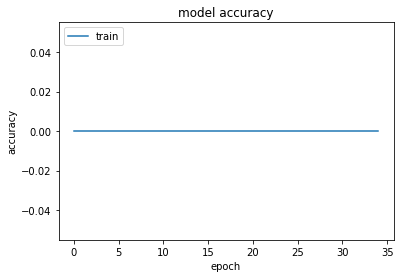

In [26]:

import matplotlib.pyplot as plt
history.history.keys()
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
model.evaluate(X_test_indices, Y_test)

105/105 [==============================] - 9s 82ms/step - loss: -1.4876 - accuracy: 0.0000e+00


[-1.4875861406326294, 0.0]

In [28]:
print(X_test[0])

instruments     b  striking   the secretary   inserting following     iii  disapproval state plan   the secretary     2  second sentence    a  striking   vouchers mail plan   inserting   food instruments mail remote issuance means state plan     b  striking   the state   inserting following     ii  state plan   the state     3  striking    b 


In [29]:
def rate_text(text:str):
    indicies = tokenizer.texts_to_sequences([text])
    print(indicies)
    indicies = pad_sequences(indicies, maxlen=maxLen, padding='post')
    print(model.predict(indicies)[0][0])

In [32]:
rate_text("Members of Congress have an opportunity to fight for their constituents by making sure rail workers get paid sick days. Any politicians who don’t side with workers need to go on the record that they voted against workers.")

[[228, 266, 23, 427, 333, 226, 4006, 81, 1355, 535, 2745, 442, 3502, 510, 113, 517, 1597, 964, 442, 724, 226, 3151, 769, 16, 704, 367, 3088, 442]]
-0.60093695


In [35]:
indicies = tokenizer.texts_to_sequences(X_test)
indicies = pad_sequences(indicies, maxlen=maxLen, padding='post')
for pred, actual in list(zip(model.predict(indicies),Y_test)):
    print(str(pred) + ', ' + str(actual))

[-0.60093695], -0.3868678975222511
[-0.60093695], 0.1954845780081286
[-0.60093695], -0.6235170686049718
[-0.60093683], -0.4088026927574129
[-0.60093594], -0.5010468840686753
[-0.600937], -0.0356025488210979
[-0.60093695], -0.4507008637114496
[-0.600936], 0.8129984999003448
[-0.6009166], 0.5956440219672412
[-0.60093695], 0.5998864166881539
[-0.600937], -0.3245309981744511
[-0.60093695], 0.4472565144689207
[-0.60093695], 0.118721473300026
[-0.60093683], -0.5776597503651107
[-0.6009261], 0.2156008845599357
[-0.6009372], -0.2035175139090042
[-0.6009359], -0.4704995756856027
[-0.60093695], 0.0203326243478305
[-0.60093695], 0.6359586619788742
[-0.6009361], 0.3129514389853109
[-0.6009365], 0.0007233110565183
[-0.6009365], 0.5063711542383118
[-0.60093695], -0.6235170686049718
[-0.60093045], -0.3458331780763265
[-0.6009319], 0.3664196625165687
[-0.6009353], -0.4704995756856027
[-0.60093594], -0.4704995756856027
[-0.60093695], 0.3082003796330872
[-0.60093695], 0.6325008023334193
[-0.6009344], -0